In [2]:
import build_influence_network as bn
import csv
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw

In [5]:
# As a csv.reader is usuable once and only once we write the lines of our csv file to a list 
with open("influence_data.csv", "rt") as infile:
    reader = csv.reader(infile)
    next(reader)
    influence_data = list(reader)
    
# As a csv.reader is usuable once and only once we write the lines of our csv file to a list 
with open("data_by_artist.csv", "rt") as infile:
    reader = csv.reader(infile)
    next(reader)
    artist_data = list(reader)

In [6]:
graph = bn.build_graph(influence_data, artist_data)

Our graph is an acyclic directed graph: False
Our artistic influence network has 5603 artists.
Our artistic influence network has 42770 edges out of a possible 31388006 possible edges.
Our network density is: 0.0013626223978675167
Our graph is strongly connected False
The number of strongly connected components is 4747
The average clustering coefficient is 0.09128001728442253


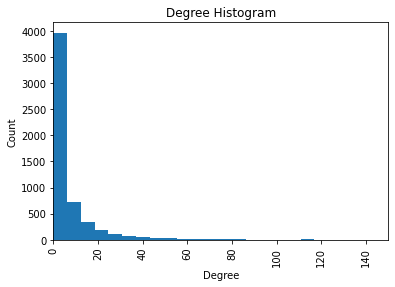

In [11]:
def plot_degree_dist(graph):
    """
    Plots a histograph of the in degree distribution of the nodes of a directed graph.
    Parameters
    ----------
    graph : a NetworkX directed graph 

    Notes
    -----
    """
    degrees = [graph.in_degree(n) for n in graph.nodes()]
    plt.hist(degrees,100)
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.xticks(rotation = 90)
    # We're doing a bit of truncating and only viewing nodes of in degree < 150
    plt.xlim([0,150])
    plt.show()

plot_degree_dist(graph)

In [12]:
def plot_power_law(graph):
    """ 
    Compare a power law distribution of node in-degrees to lognormal, exponential, lognormal positive, stretched exponential, and truncated power law       

    Parameters
    ----------
    graph : a NetworkX directed graph
        
    Notes
    -----
    See comment by Aaron Clauset in the thread:
    https://stackoverflow.com/questions/49266070/comparing-power-law-with-other-distributions

    """
    data = [graph.in_degree(n) for n in graph.nodes()]
    fit = powerlaw.Fit(data)
    print("-------------------")
    print("Power law compared with lognormal: " + str(fit.distribution_compare('power_law', 'lognormal')))
    print("Power law compared with exponential: " + str(fit.distribution_compare('power_law', 'exponential')))
    print("Power law compared with lognormal positive: " + str(fit.distribution_compare('power_law', 'lognormal_positive')))
    print("Power law compared with stretched exponential: " + str(fit.distribution_compare('power_law', 'stretched_exponential')))
    print("Power law compard with truncated power law: " + str(fit.distribution_compare('power_law', 'truncated_power_law')))
    print("-------------------")
    ''' 
    print(results.power_law.alpha)
    print(results.power_law.xmin)
    print(np.isfinite(data).all())
    #figPDF = powerlaw.plot_pdf(np.array(data), color='b')
    #powerlaw.plot_pdf(np.array(data), linear_bins=True, color='r', ax=figPDF)
    #np.seterr(divide='ignore', invalid='ignore')
    fit=powerlaw.Fit(np.array(data), discrete=True)
    #print(fit.power_law.alpha)
    print(fit.distribution_compare('power_law', 'truncated_power_law'))
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
    # Linear bins?
    fit.plot_pdf(color= 'r', linear_bins=True)
    # Logarithmic bins?
    fit.plot_pdf(color = 'g')
    plt.show()
    '''
plot_power_law(graph)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/opt/miniconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


-------------------
Power law compared with lognormal: (-1.3800224715833833, 0.3139509935226249)
Power law compared with exponential: (40.66105530901663, 0.008631217956483306)
Power law compared with lognormal positive: (-1.315819712033119, 0.43806014779742586)
Power law compared with stretched exponential: (-1.476805738925889, 0.36557860921379937)


Assuming nested distributions


Power law compard with truncated power law: (-1.8816193169266402, 0.052391009976793246)
-------------------
